In [6]:
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.transformations as transformations
import numpy as np
import matplotlib.pyplot as plt


In [15]:
data1 = np.loadtxt("/home/as12009/comp-lab-class/Week12/Runs/Proton/proton_amid_1ps_every0.5fs-1.ener")

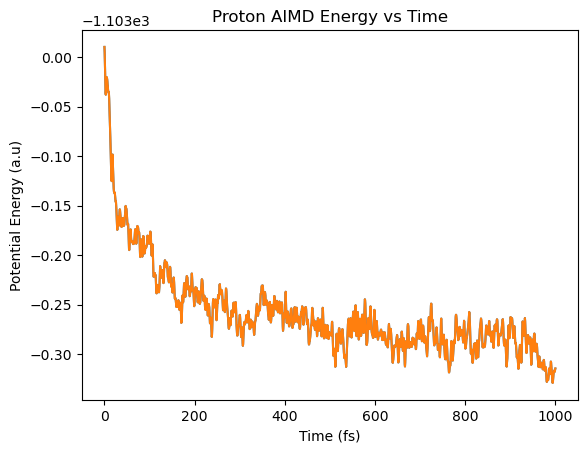

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(data1[:,1],data1[:,4])
plt.title("Proton AIMD Energy vs Time")
plt.plot(time, energy)
plt.xlabel("Time (fs)")
plt.ylabel("Potential Energy (a.u)")
plt.show()
plt.savefig('/home/as12009/comp-lab-class/Week12/Figures/ProtonAIMDEnergyvTime.png')

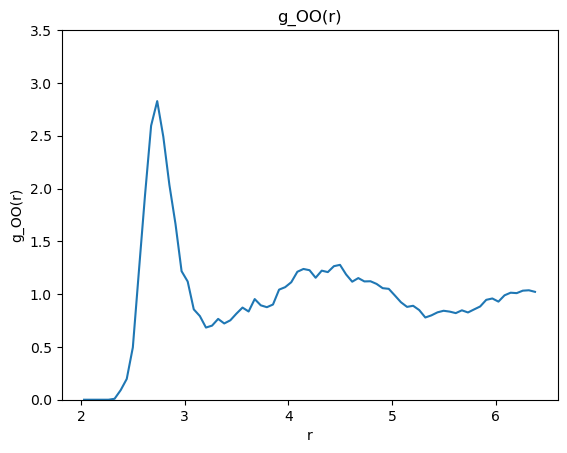

<Figure size 640x480 with 0 Axes>

In [24]:
u = mda.Universe("proton.xyz", "proton_amid_1ps_every0.5fs-pos-1.xyz", topology_format = "XYZ")

dim = [12.42, 12.42, 12.42, 90, 90, 90]
transform = transformations.boxdimensions.set_dimensions(dim)
u.trajectory.add_transformations(transform)

RDFOO = rdf.InterRDF(u.select_atoms("name O"), u.select_atoms("name O"), range = (2.0, 6.41))
RDFOO.run()

plt.plot(RDFOO.results.bins, RDFOO.results.rdf)


plt.xlabel('r')
plt.ylabel('g_OO(r)')
plt.ylim(0,3.5)
plt.title('g_OO(r)')
plt.show()
plt.savefig('/home/as12009/comp-lab-class/Week12/Figures/g_OOrproton.png')